In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

import unicodedata
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize


from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report

from sklearn import model_selection, naive_bayes, svm

from sklearn.linear_model import SGDClassifier

from sklearn.linear_model import LogisticRegression


C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://num

In [2]:
df = pd.read_csv("Completed2.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print("The number of rows are {}." .format(df.shape[0]))
print("The number of columns are {}." .format(df.shape[1]))

The number of rows are 1675.
The number of columns are 4.


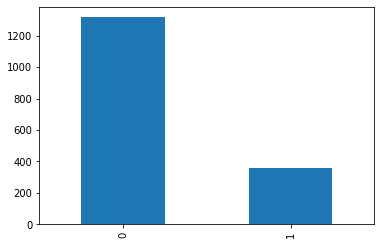

In [3]:
#let's check the fraud and non-fraud case distribution of the target varibale 

df['isFraud'].value_counts().plot.bar()

**Data Cleaning**

1) Removing Contractions<br>
2) Removing Stopwords<br>
3) Removing symbols and special characters<br>
4) Removing punctuations<br>
5) Convert to lowercase 

In [4]:
#creating a dictionary of contractions 

contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [5]:
#function for defining contraction's:

def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

#function for removing unicode data :

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

#function for removing all the scrub words
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text until space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    

    return text

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text


In [6]:
#using contractions dictionary to make corrections 
df['MDA'] = [expand_contractions(re.sub('’', "'", text)) for text in df['MDA']]
#removing accented characters 
df['MDA'] = [remove_accented_chars(text) for text in df['MDA']]
#stripping the words using space 
df['MDA'] = [text.strip().lower() for text in df['MDA']]
#re-placing " " " with space 
df['MDA'] = [text.replace('"', '') for text in df['MDA']]
#replace spaaces more than one with single space 
df['MDA'] = [re.sub("\s+", ' ', text) for text in df['MDA']]

#removing scrub_words
df['MDA'] = [scrub_words(text) for text in df['MDA']]

df['MDA'] = df['MDA'].apply(clean_text)

df['MDA'] = [re.sub('[^a-zA-Z]+', ' ', text) for text in df['MDA']]



# **EDA And Visualisation**

Conducting elementary visualisation and EDA 

In [7]:
#Importing relevant Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

import plotly
import plotly.offline as pyoff

import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

C:\Users\Mesbaul\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
#Creating new dataframes for fraud and non-fraud elements respectively

df2 = df.loc[df['isFraud'] == 1]
df3 = df.loc[df['isFraud'] == 0]

In [9]:
# Cleaning the data, a.k.a, changing the type of the column YEARA from either DD/MM/YY type object to float, or
# from string type object to float.

df2['YEARA'] = df2['YEARA'].astype(float, errors = 'raise')
df3['YEARA'] = df3['YEARA'].str.slice(0,4)
df3['YEARA'] = df3['YEARA'].astype(float, errors = 'raise')

(array([15., 27., 81., 40., 23., 48., 37., 56., 20., 12.]),
 array([2000. , 2001.4, 2002.8, 2004.2, 2005.6, 2007. , 2008.4, 2009.8,
        2011.2, 2012.6, 2014. ]),
 <a list of 10 Patch objects>)

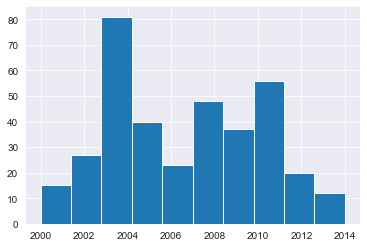

In [10]:
# Plotting a histogram of the frequency of fraud elements from the database

plt.hist(df2['YEARA'])

(array([ 28.,  32., 143.,  93.,  47.,  86., 103., 313., 168., 303.]),
 array([2000. , 2001.4, 2002.8, 2004.2, 2005.6, 2007. , 2008.4, 2009.8,
        2011.2, 2012.6, 2014. ]),
 <a list of 10 Patch objects>)

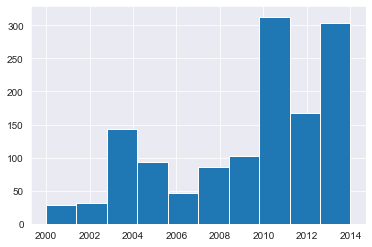

In [11]:
# Plotting a histogram of the frequency of non-fraud elements from the database

plt.hist(df3['YEARA'])

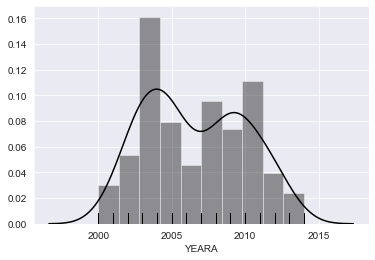

In [12]:
# This distplot represents density of the variable in the span of years

sns.distplot(df2['YEARA'], rug = True, color = 'black')

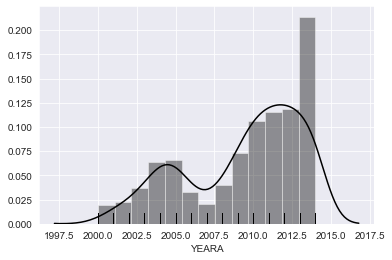

In [13]:
# This distplot represents density of the variable in the span of years

sns.distplot(df3['YEARA'], rug = True, color = 'black')

In [14]:
df.describe(include='all')

,CIK,YEARA,isFraud,MDA
count,1.675000e+03,1675,1675.000000,1675
unique,NaN,1311,NaN,1647
top,NaN,2004,NaN,item management discussion analysis financial ...
freq,NaN,41,NaN,12
mean,1.039140e+06,NaN,0.214328,NaN
std,4.111649e+05,NaN,0.410478,NaN
min,2.135000e+03,NaN,0.000000,NaN
25%,8.710795e+05,NaN,0.000000,NaN
50%,1.097792e+06,NaN,0.000000,NaN
75%,1.371367e+06,NaN,0.000000,NaN


In [15]:
df['MDA'].describe()

count                                                  1675
unique                                                 1647
top       item management discussion analysis financial ...
freq                                                     12
Name: MDA, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1675 entries, 0 to 1674
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CIK      1675 non-null   int64 
 1   YEARA    1675 non-null   object
 2   isFraud  1675 non-null   int64 
 3   MDA      1675 non-null   object
dtypes: int64(2), object(2)
memory usage: 52.5+ KB


In [17]:
df2 

,CIK,YEARA,isFraud,MDA
0,846909,2000.0,1,item management discussion analysis financial ...
1,14272,2001.0,1,item management discussion analysis financial ...
2,1085776,2001.0,1,item management discussion analysis financial ...
3,814580,2001.0,1,item management discussion analysis financial ...
4,814580,2002.0,1,item management discussion analysis financial ...
...,...,...,...,...
354,1092492,2012.0,1,item management discussion analysis financial ...
355,1357615,2013.0,1,item management discussion analysis financial ...
356,902791,2012.0,1,item management discussion analysis financial ...
357,902791,2013.0,1,item management discussion analysis financial ...


In [18]:
# Sorting the values of fraudulent elemnts according to year to conduct further analysis

df2 = df2.sort_values(by=['YEARA'])

In [19]:
# Adding the variable length to compute the approximate length of the MDA

df2['length'] = df2.apply(lambda row: len(row.MDA) 
                                  , axis = 1)
df2

,CIK,YEARA,isFraud,MDA,length
0,846909,2000.0,1,item management discussion analysis financial ...,70325
26,29915,2000.0,1,item management discussion analysis financial ...,34999
78,915840,2000.0,1,item management discussion analysis financial ...,389
58,731766,2000.0,1,item management discussion analysis financial ...,73
51,812900,2001.0,1,item management discussion analysis financial ...,205
...,...,...,...,...,...
339,1039101,2013.0,1,item management discussion analysis financial ...,101315
337,779152,2013.0,1,item management discussion analysis financial ...,37036
338,779152,2014.0,1,item management discussion analysis financial ...,34768
348,1360886,2014.0,1,item management discussion analysis financial ...,32031


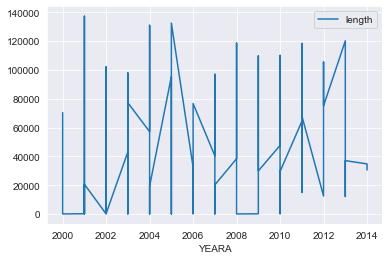

In [20]:
# We want to see the trend of sizes of MDAs so we try plotting the length w.r.t the YEARA, but there is a problem
# that we will notice. There are some huge variations due to which the trend is not an accurate representation.

df2.plot( 'YEARA' , 'length')

# Therefore, we will have to manipulate the data further to get a better understanding.

In [21]:
# Creating a new dataframe which contains yearwise average length of fraudulent elements

aggregation_functions = {'length': 'mean'}
df_new = df2.groupby(df2['YEARA']).aggregate(aggregation_functions)

In [22]:
df_new

,length
YEARA,
2000.0,26446.500000
2001.0,27040.000000
2002.0,27303.148148
2003.0,41154.150000
2004.0,47282.170732
2005.0,47928.750000
2006.0,36145.086957
2007.0,40403.857143
2008.0,36067.037037


In [23]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 15 entries, 2000.0 to 2014.0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   length  15 non-null     float64
dtypes: float64(1)
memory usage: 240.0 bytes


In [24]:
# Editing the dataframe and making sure the indices match

df_new = df_new.reset_index(drop=False)

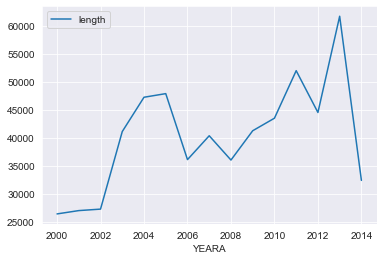

In [25]:
# Plotting the moving average of the average length of MDAs over the span of years from 2000 to 2014

df_new.plot(x='YEARA')

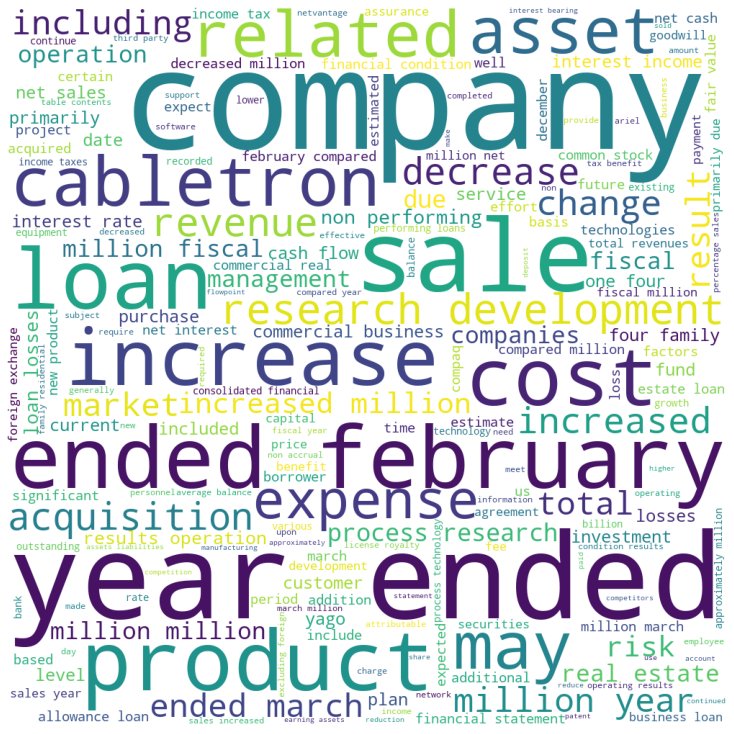

In [26]:
# Creating a wordcloud to see which words are most frequent in the parent database
# The parent database includes fraudulent and non-fraudulent elements 

from wordcloud import WordCloud

text = df['MDA'].values 

wordcloud = WordCloud().generate(str(text))

wordcloud = WordCloud(width = 1000, height = 1000, 
            background_color ='white', 
            min_font_size = 10).generate(str(text))

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

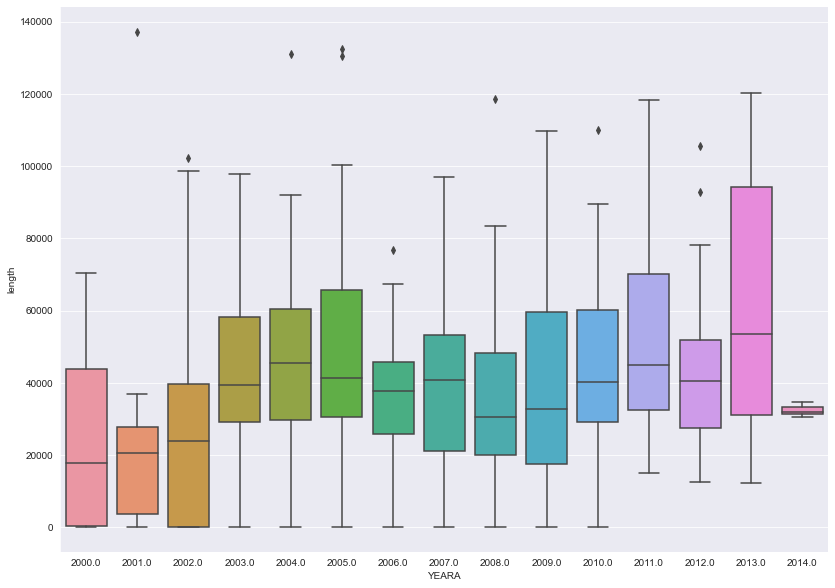

In [27]:
# The boxplot represents the distribution of the length of MDAs

sns.catplot(kind='box', data=df2, x='YEARA', y='length',height=8.27, aspect=11.7/8.27)

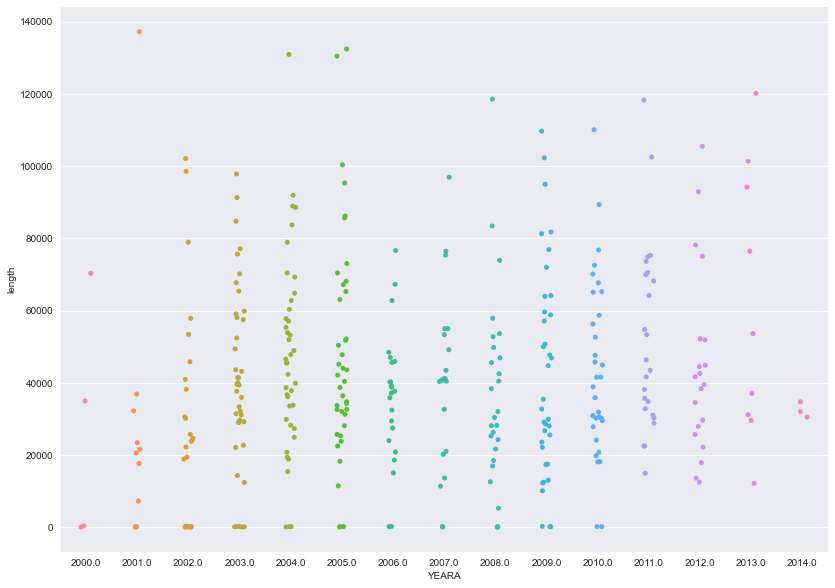

In [28]:
# The scatterplot represents the distribution of the length of MDAs

bp = sns.catplot(data=df2, x='YEARA', y='length', jitter=True, height=8.27, aspect=11.7/8.27)

In [29]:
df = df.drop(["YEARA","CIK"],1)
df

C:\Users\Mesbaul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,isFraud,MDA
0,1,item management discussion analysis financial ...
1,1,item management discussion analysis financial ...
2,1,item management discussion analysis financial ...
3,1,item management discussion analysis financial ...
4,1,item management discussion analysis financial ...
...,...,...
1670,0,item management discussion analysis plan opera...
1671,0,item management discussion analysis financial ...
1672,0,item management discussion analysis financial ...
1673,0,item management discussion analysis financial ...


## **Post Cleaning**

In [30]:
df.iloc[0]["MDA"]

'item management discussion analysis financial condition results operations following discussion provides analysis cabletron financial condition results operations read conjunction consolidated financial statements notes thereto included elsewhere annual report form k discussion contains certain forward looking statements relating among things estimates economic industry conditions sales trends expense levels capital expenditures actual results may vary contained forward looking statements see business environment risk factors results operations table sets forth company net sales cost sales expenses category income loss operations interest income net income net income loss income taxes net income loss expressed percentages net sales fiscal years ended february february net sales cost sales gross profit research development selling general administrative amortization intangible assets special charges loss operations interest income net income net income loss income taxes income tax expe

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns
sns.set_palette("muted")
    

def calc_f1(p_and_r):
    p, r = p_and_r
    return (2*p*r)/(p+r)


# Print the F1, Precision, Recall, ROC-AUC, and Accuracy Metrics 
# Since we are optimizing for F1 score - we will first calculate precision and recall and 
# then find the probability threshold value that gives us the best F1 score

def print_model_metrics(y_test, y_test_prob, confusion = False, verbose = True, return_metrics = False):

    precision, recall, threshold = precision_recall_curve(y_test, y_test_prob, pos_label = 1)
    
    #Find the threshold value that gives the best F1 Score
    best_f1_index =np.argmax([calc_f1(p_r) for p_r in zip(precision, recall)])
    best_threshold, best_precision, best_recall = threshold[best_f1_index], precision[best_f1_index], recall[best_f1_index]
    
    # Calulcate predictions based on the threshold value
    y_test_pred = np.where(y_test_prob > best_threshold, 1, 0)
    
    # Calculate all metrics
    f1 = f1_score(y_test, y_test_pred, pos_label = 1, average = 'binary')
    roc_auc = roc_auc_score(y_test, y_test_prob)
    acc = accuracy_score(y_test, y_test_pred)
    
    
    if confusion:
        # Calculate and Display the confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)

        plt.title('Confusion Matrix')
        sns.set(font_scale=1.0) #for label size
        sns.heatmap(cm, annot = True, fmt = 'd', xticklabels = ['No Clickbait', 'Clickbait'], yticklabels = ['No Clickbait', 'Clickbait'], annot_kws={"size": 14}, cmap = 'Blues')# font size

        plt.xlabel('Truth')
        plt.ylabel('Prediction')
        
    if verbose:
        print('F1: {:.3f} | Pr: {:.3f} | Re: {:.3f} | AUC: {:.3f} | Accuracy: {:.3f} \n'.format(f1, best_precision, best_recall, roc_auc, acc))
    
    if return_metrics:
        return np.array([f1, best_precision, best_recall, roc_auc, acc])
    
    

# Run Simple Log Reg Model and Print metrics
from sklearn.linear_model import SGDClassifier

# Run log reg 10 times and average the result to reduce prediction variance
def run_log_reg(train_features, test_features, y_train, y_test,  alpha = 1e-4, confusion = False, return_f1 = False, verbose = True):
    metrics = np.zeros(5)
    for _ in range(10):
        log_reg = SGDClassifier(loss = 'log', alpha = alpha, n_jobs = -1, penalty = 'l2')
        log_reg.fit(train_features, y_train)
        y_test_prob = log_reg.predict_proba(test_features)[:,1]
        metrics += print_model_metrics(y_test, y_test_prob, confusion = confusion, verbose = False, return_metrics = True)
    metrics /=10
    if verbose:
        print('F1: {:.3f} | Pr: {:.3f} | Re: {:.3f} | AUC: {:.3f} | Accuracy: {:.3f} \n'.format(*metrics))
    if return_f1:
        return f1
    return log_reg

In [40]:
X = df["MDA"]
y = df["isFraud"]
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.3, random_state = 42)

C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additio

**Bag of Words Approach**

In [33]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(ngram_range=(1, 1), lowercase = True , stop_words =  'english')

# Fit the training data and then return the matrix
X_train = count_vector.fit_transform(x_train) 
# to get the the list of feature words that are lowercase with no puttutaion or stop words
#Since you fit transform X data training
# they convert data to integer data

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
X_test = count_vector.transform(x_test)
#Since you transform X data testing
# they convert data to integer data

In [34]:
doc_array =  X_train.toarray()
X_train_feature_list = count_vector.get_feature_names()
frequency_matrix_X_train = pd.DataFrame((doc_array),columns = X_train_feature_list)
frequency_matrix_X_train

,aa,aaa,aaasf,aac,aag,aahp,aai,aaipharma,aarp,aasf,...,zurich,zweben,zwei,zwirn,zwolle,zygo,zyoptix,zyray,zyt,zyxel
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1169,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1170,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-block alert-info" align=center><b></b>

# Naive-Bayes (BoW)

In [35]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train , y_train)
predictions = naive_bayes.predict(X_test)
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))

Accuracy score:  0.8031809145129225


<div class="alert alert-block alert-info" align=center><b></b>

# SVM (BoW)

In [36]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train , y_train)
predictions_SVM = SVM.predict(X_test)
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

SVM Accuracy Score ->  79.32405566600397


<div class="alert alert-block alert-info" align=center><b></b>

# Logistic Regression (BoW)

In [37]:
print(run_log_reg(X_train,X_test,y_train,y_test))


C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.

C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



F1: 0.551 | Pr: 0.685 | Re: 0.708 | AUC: 0.810 | Accuracy: 0.850 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=-1, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


**TF-IDF**

In [38]:
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [ ]:
Train_X_Tfidf

<div class="alert alert-block alert-info" align=center><b></b>

# Naive-Bayes (TF-IDF)

In [39]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(x_train , y_train)
predictions = naive_bayes.predict(x_test)
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))


Accuracy score:  0.7852882703777336


<div class="alert alert-block alert-info" align=center><b></b>

# SVM (TF-IDF)

In [41]:
from sklearn.pipeline import Pipeline
text_svm = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                      ('clf', svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')),
                    ])
text_svm = text_svm.fit(x_train , y_train)
predictions = text_svm.predict(x_test)
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))

Accuracy score:  0.8707753479125249


<div class="alert alert-block alert-info" align=center><b></b>

# Logistic Regression (TF-IDF)

In [42]:
from sklearn.pipeline import Pipeline
text_lr = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                      ('clf', SGDClassifier(loss = 'log', alpha = 1e-4, n_jobs = -1, penalty = 'l2')),
                    ])
text_lr = text_lr.fit(x_train , y_train)
predictions = text_lr.predict(x_test)
print('Accuracy score: ', format(accuracy_score(predictions,y_test)))

Accuracy score:  0.8926441351888668


C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<div class="alert alert-block alert-info" align=center><b></b>

# GridSearchCV on SVM

In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
             'clf__C': [0.1,1, 10, 100], 
             'clf__kernel': ['rbf', 'poly', 'sigmoid','linear'],
             'clf__gamma': [1,0.1,0.01,0.001]
             }

gs_clf = GridSearchCV(text_svm, parameters, n_jobs=-1, verbose=2)
gs_clf = gs_clf.fit(x_train, y_train)




C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doi

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 50.9min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed: 56.2min finished
C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:794: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [44]:
grid_predictions = gs_clf.predict(x_test) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.92


<div class="alert alert-block alert-info" align=center><b></b>

# GridSearchCV on LR

In [49]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'clf__loss' : ["log"],
             'clf__alpha' : [0.0001, 0.001, 0.01, 0.1],
              'clf__penalty' : ["l2", "l1", "none"],
             }

gs_clf = GridSearchCV(text_lr, parameters, n_jobs=-1, verbose=2)
gs_clf = gs_clf.fit(x_train, y_train)

C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.

C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doi

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  5.2min finished
C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:794: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [51]:
grid_predictions = gs_clf.predict(x_test) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.92


C:\Users\Mesbaul\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

